#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Load Dataset

In [2]:
# Read CSV
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [3]:
df.duplicated().any()

True

Periksa apakah ada missing values

In [4]:
print(df.isnull().any())

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool


Periksa outlier dengan boxplot untuk setiap kolom feature

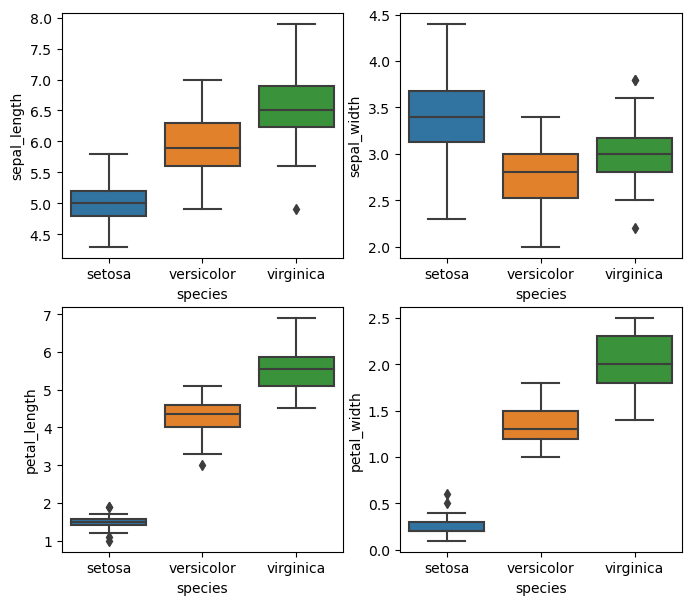

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(8,7))
sns.boxplot(x=df["species"], y=df["sepal_length"], orient='v', ax=axes[0,0])
sns.boxplot(x=df["species"], y=df["sepal_width"], orient='v', ax=axes[0,1])
sns.boxplot(x=df["species"], y=df["petal_length"], orient='v', ax=axes[1,0])
sns.boxplot(x=df["species"], y=df["petal_width"], orient='v', ax=axes[1,1])
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [6]:
X = df.drop('species', axis = 1)
Y = df['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [11]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 1)
print(X_train.shape)
print(y_train.shape)

(135, 4)
(135,)


Lakukan fitur scaling pada variabel X_train dan X_test. 

In [24]:
scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_sc = scaling.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [25]:
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_scaled, y_train)
classifier_pred = classifier.predict(X_test_sc)

meassureaccuracy = accuracy_score(y_test, classifier_pred)
print("Accuracy Score : ", akurasi)
print(classifier)

Accuracy Score :  1.0
LogisticRegression(random_state=0)


Uji model dengan dataset test

In [32]:
logistic_pred = classifier.predict(X_test_sc)

print(logistic_pred)

['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor']


In [41]:
from sklearn.metrics import confusion_matrix

logistic_pred = classifier.predict(X_test_sc)
cm = confusion_matrix(y_test, logistic_pred)
print("Confusion Matrix : ")
print(cm)

ma = accuracy_score(y_test, logistic_pred)
print("Accuracy Score : ", ma)

Confusion Matrix : 
[[5 0 0]
 [0 6 0]
 [0 0 4]]
Accuracy Score :  1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [105]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [111]:
y_pred = classifier.predict(X_test)
print(y_pred)

['virginica' 'versicolor' 'virginica' 'virginica' 'virginica' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy: ", accuracy)

Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy:  1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [68]:
model = KNeighborsClassifier(metric='euclidean')
model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [79]:
y_pred = classifier.predict(X_test)
print(y_pred)

['virginica' 'versicolor' 'virginica' 'virginica' 'virginica' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Ukur akurasi dari model K-Nearest Neighbor

In [78]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy Score:  1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah 1.0